In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

In [18]:
data = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\DATA\BTC-USD.csv') 
data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,387.026001,387.730011,378.971985,380.148987,380.148987,46819800
1,2016-01-20,379.739990,425.266998,376.598999,420.230011,420.230011,121720000
2,2016-01-21,419.631989,422.877014,406.299988,410.261993,410.261993,68338000
3,2016-01-22,409.751007,410.410004,375.282013,382.492004,382.492004,91546600
4,2016-01-23,382.433990,394.542999,381.980988,387.490997,387.490997,56247400


In [19]:
data.set_index('Date', inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-19,387.026001,387.730011,378.971985,380.148987,380.148987,46819800
2016-01-20,379.739990,425.266998,376.598999,420.230011,420.230011,121720000
2016-01-21,419.631989,422.877014,406.299988,410.261993,410.261993,68338000
2016-01-22,409.751007,410.410004,375.282013,382.492004,382.492004,91546600
2016-01-23,382.433990,394.542999,381.980988,387.490997,387.490997,56247400
...,...,...,...,...,...,...
2022-01-15,43101.898438,43724.671875,42669.035156,43177.398438,43177.398438,18371348298
2022-01-16,43172.039063,43436.808594,42691.023438,43113.878906,43113.878906,17902097845
2022-01-17,43118.121094,43179.390625,41680.320313,42250.550781,42250.550781,21690904261


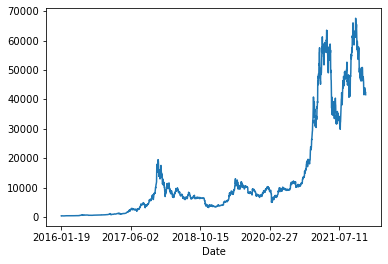

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data['Close'].plot()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Close'], autolag='AIC')
result

(-0.8343323568527355,
 0.8088286357097509,
 24,
 2168,
 {'1%': -3.433369861402103,
  '5%': -2.8628740689440835,
  '10%': -2.5674801917270327},
 35298.8407608048)

In [22]:
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -0.83
5% Critical Value: -2.86
p-value: 0.81


In [23]:
#pvalue is higher than 0.05 so we accept H0 cad it is not stationary

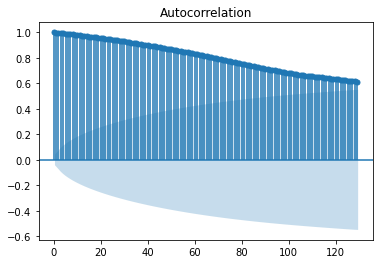

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(data['Close'], lags=129)
# Show the data as a plot (via matplotlib)
plt.show()

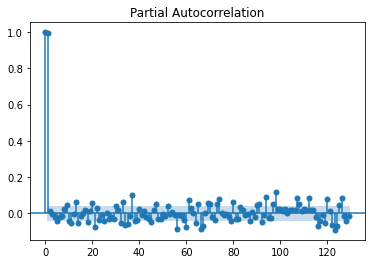

In [25]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(data['Close'], alpha =0.05, lags=129)
plt.show()

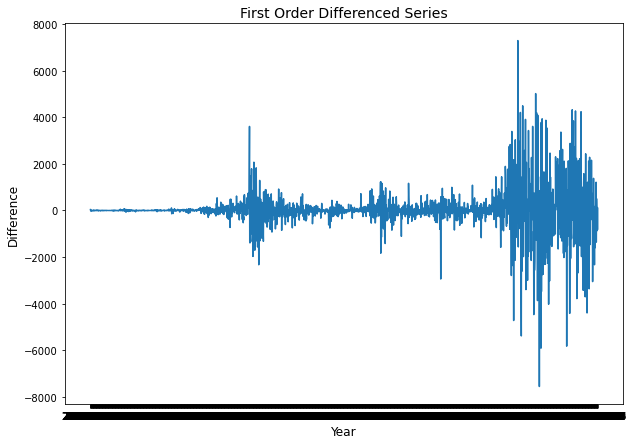

In [45]:
#because it is not stationnary, we make stationary
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day. # je mets mes données statitionary
data['Diff'] = data['Close'].diff()
data['Diff'] = data['Diff'].dropna()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [46]:
result = adfuller(data.Diff.dropna()) #ne pas oublié de supprimer les data nul
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-9.14243562922074, 2.825630575696099e-15, 23, 2168, {'1%': -3.433369861402103, '5%': -2.8628740689440835, '10%': -2.5674801917270327}, 35282.27142514937)
ADF Test Statistic: -9.14
5% Critical Value: -2.86
p-value: 0.00


In [47]:
#now it is stationnary

In [65]:
#now we split data, to create model and do prediction
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(data['Diff'])

In [68]:
train.sort_index() #We need to sort car la fonction prend 25% eT 75% au hazard et donc en desordre ( pas possible ensuite de faire des predictions                                                                              )

Date
2016-01-19           NaN
2016-01-20     40.081024
2016-01-21     -9.968018
2016-01-22    -27.769989
2016-01-23      4.998993
                 ...    
2022-01-14    508.128906
2022-01-16    -63.519532
2022-01-17   -863.328125
2022-01-18    125.082032
2022-01-19   -796.824219
Name: Diff, Length: 1644, dtype: float64

In [49]:
index= data.shape[0]-500
train, test = data['Diff'][0:index], data['Diff'][index:]

In [50]:
test

Date
2020-09-07     89.211914
2020-09-08   -238.046875
2020-09-09    110.831054
2020-09-10    120.791016
2020-09-11     37.776367
                 ...    
2022-01-15     77.699219
2022-01-16    -63.519532
2022-01-17   -863.328125
2022-01-18    125.082032
2022-01-19   -796.824219
Name: Diff, Length: 500, dtype: float64

In [51]:
test.index[0]

'2020-09-07'

In [52]:
from statsmodels.tsa.arima_model import ARMA

In [55]:
train=train.dropna()
model1 = ARMA(train, order=(1,1))
result = model1.fit()



C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [56]:
from statsmodels.tools.eval_measures import rmse
pred1=result.predict(start=test.index[0], end=test.index[-1], exog=test)
pred1

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:827: SpecificationWarning: 
The number of observations in exog does not match the number of out-of-sample
observations.  This might indicate that exog is not correctly aligned. exog
should be aligned so that the exog[0] is used for the first out-of-sample
forecast, and exog[-1] is used for the last out-of-sample forecast.
exog is not used for in-sample observations which are the fitted values.

To silence this warning, ensure the number of observation in exog (500)
matches the number of out-of-sample forecasts (500)'

  warnings.warn(msg, SpecificationWarning)


2020-09-07    19.733359
2020-09-08    -4.970936
2020-09-09    14.240409
2020-09-10    -0.699332
2020-09-11    10.918588
                ...    
2022-01-15     5.836210
2022-01-16     5.836210
2022-01-17     5.836210
2022-01-18     5.836210
2022-01-19     5.836210
Freq: D, Length: 500, dtype: float64

In [57]:
from statsmodels.tools.eval_measures import rmse
rmse1 = rmse(pred1[1], test)
rmse1

1659.6045805168094

In [58]:
model2 = ARMA(train, order=(6,2))
result2 = model2.fit()
pred2=result2.predict()
rmse2 = rmse(pred2[1], test)
rmse2

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1659.181013131508

In [59]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
model3 = ARIMA(train, order=(5,1,0))
result3 = model3.fit()
pred3=result3.predict()
rmse3 = rmse(pred2[1], test)
rmse3

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1659.181013131508

<AxesSubplot:xlabel='Date'>

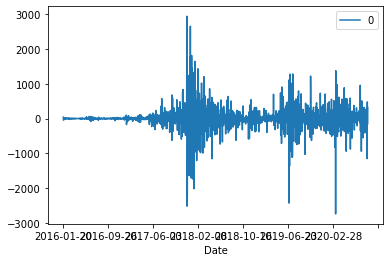

In [64]:
from pandas import DataFrame
residuals = DataFrame(result3.resid)
residuals.plot()